<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование данных о продажах компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Общая информация

In [1]:
# 1. Импортируем библиотеки:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# 2. Загрузим данные в датафрейм из ссылки:

data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep = ',')
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
# 3. Изучим общую информацию о полученном датафрейме.

data.info() 
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

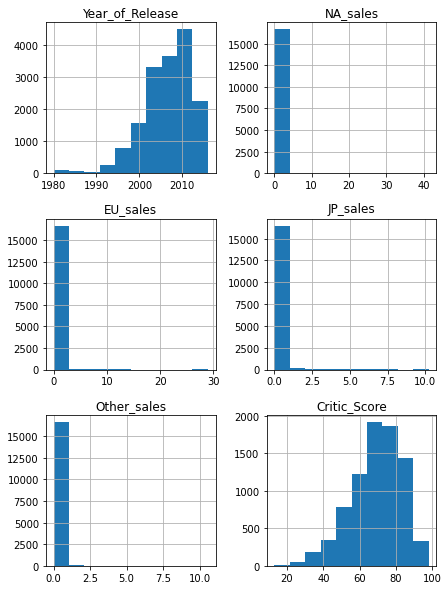

In [4]:
# 4. Построим гистограммы для всех столбцов таблицы.

data.hist(figsize=(7, 10));

<span style="color:blue">В рассматриваемом датафрейме 11 столбцов и 16715 строчек. В ряде столбцов имеются пропуски, работа над которыми будет проведена ниже. Тип данных столбца "дата выхода" целесообразно изменить с float на int, т.к. года исчисляются целыми числами. Тип данных столбца "оценка пользователя" целесообразно изменить с object на float, т.к. фактически в этом столбце указаны числа с плавающей точкой.</span>

### Подготовка данных

In [5]:
# 1. Приведем названия столбцов к нижнему регистру:

data.columns = data.columns.str.lower()
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<span style="color:blue">Названия всех столбцов теперь указаны в нижнем регистре.</span>

In [6]:
# 2. Изменим тип данных в столбце "год выпуска" на int, для чего сначала удалим пропуски в столбце:

data = data.dropna(subset = ['year_of_release'])
print(data.isna().sum())
data.info()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(

<span style="color:blue">После удаления пропусков в столбце "год выхода" кол-во строк в датафрейме сократилось на 269 c 16715 до 16446. После этого появилась возможность поменять тип данных этого столбца на int. </span>

In [7]:
# Поменяем тип данных столбца "год выхода" на int:

data['year_of_release'] = data['year_of_release'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [8]:
# Изменим тип данных в столбце "оценка пользователя" на float, для чего сначала посмотрим, какие 
# данные находятся в столбце и не помешают ли они изменению типа данных:

print(data['user_score'].value_counts(dropna=False))
print(data['user_score'].isna().sum())

NaN    6607
tbd    2376
7.8     322
8       285
8.2     276
       ... 
9.6       2
1.9       2
1.1       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64
6607


<span style="color:blue">В столбце "оценка пользователя" помимо 6607 пропусков также значится 2376 значений "tbd", что, по-видимому, означает "to be determinated" ("подлежит определению"). Чтобы в дальнейшем при работе со столбцом все пропуски воспринимались одинаково, целесообразно заменить значения "tbd" на пропуски NaN.</span>

In [9]:
# Заменим значения "tbd" в столбце "оценка пользователя" на NaN и поменяем тип данных на float:

data['user_score'] = data['user_score'].replace('tbd', 'NaN').astype('float64')
print(data.isna().sum())
data.info()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(

<span style="color:blue">После замены в столбце "оценка пользователя" значений "tbd" на NaN пропусков NaN в столбце стало 8983 (6607 + 2376). Данные пропуски заменять чем-либо (средней, медианой) нецелесообразно, т.к. столбец "оценка пользователя" содержит субъективные оценки пользователей, и любая замена может привести к искажению данных. Удалять строки с этими пропусками нецелесообразно ввиду их большого количества.</span>

In [10]:
# 3. Обработаем оставшиеся пропуски, кроме тех, что были устранены при изменении типов данных.

data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

<span style="color:blue">Среди пропусков остались по два пропуска в столбцах "название" и "жанр", а также пропуски в столбах с рейтингами.</span>

In [11]:
# Удалим строки с пропусками в столбце "название":

data = data.dropna(subset = ['name'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

<span style="color:blue">Два пропуска в столбце "название" исчезли. Также вместе с ними исчезли два пропуска в столбце "жанр".</span>

In [12]:
# Посмотрим, какие данные есть в столбцах "оценка критиков" и "рейтинг ESRB":

print(data['critic_score'].unique())
print(data['rating'].unique())
print(data['rating'].value_counts())
print(data.isna().sum())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64


<span style="color:blue">В столбце "оценка критика" число пропусков "nan" составляет 8461, а в столбце "рейтинг" - 6676. Их заменять не будем по аналогии с данными в столбце "оценка пользователя", т.к. это субьективные данные и любая их замена может привести к искажению данных. Удалять строки с этими пропусками нецелесообразно ввиду их большого количества. В столбце "рейтинг" целесообразно заменить рейтинг K-A, который согласно данным Википедии (https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board) использовался до 1999г., на рейтинг E, который пришел ему на смену.</span>

In [13]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'
data['rating'].value_counts()

E       3924
T       2905
M       1536
E10+    1393
EC         8
RP         1
AO         1
Name: rating, dtype: int64

<span style="color:blue">Три игры с рейтингом K-A присоединились к рейтингу E, последних стало 3924 шт.</span>

In [14]:
# 4. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

data['sum_sales'] =  data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [15]:
# 5. Проверим датафрейм на наличие дубликатов в части совпадающих названий игр
# на одних и тех же платформах:

data.duplicated(subset=['name','platform']).value_counts()

False    16441
True         3
dtype: int64

<span style="color:blue">В датафрейме присутствуют три дубликата в названиях игр, выпущенных на одной и той же платформе.</span>

In [16]:
# Удалим обнаруженные дубликаты в наименованиях игр на одной и той же платформе:
data = data.drop_duplicates(subset=['name','platform'], keep = 'first')
print(data.duplicated(subset=['name','platform']).value_counts())

False    16441
dtype: int64


<span style="color:blue">Дубликаты удалены. В остальных столбцах одиночно или попарно дубликаты искать не имеет смысла, т.к. в датафрейме перечислены игры на всех платформах, соответственно, будет много повторов как в названиях самих игр, так и в названиях игр совместно с жанрами, так и в названиях игр совместно с годом выпуска.</span>

<span style="color:blue">

По результатам предобработки данных:
- названия столбцов приведены к нижнему регистру;
- тип данных в столбце "год выпуска" заменен на int, а перед этим удалены строки с пропусками в этом столбце;
- тип данных в столбце "оценка пользователя" изменен на float, а перед этим значения "tbd" заменены на NaN, пропуски в этом столбце не заменялись в виду субъективности данных в этих столбцах и нецелесообрахности их замены на среднюю, медиану и т.д., и не удалялись ввиду большого количества строк с пропусками;
- из датафрейма удалены две строки с пропусками в столбцах "название" и "жанр";
- в столбцах "оценка критика" и "рейтинг" пропуски не заменялись в виду субъективности данных в этих столбцах и нецелесообрахности их замены на среднюю, медиану и т.д., и не удалялись ввиду большого количества строк с пропусками;
- в столбце "рейтинг" рейтинг K-A заменен на E, т.к. рейтинг K-A использовался до 1999 года, ему на смену пришел рейтинг E;
- добавлен столбец с общими продажами по каждой игре по всем регионам;
- удалены три дубликата в наименованиях игр, выпущенных на одной и той же платформе.

Возникновение пропусков в датафрейме можно объяснить следующим:

- в столбце "год выпуска" - например, в связи отсутствием данных у заполняющего;
- в столбцах "название" и "жанр" - возможно, в связи с ошибкой заполняющего;
- в столбцах "оценка пользователя", "оценка критика", "рейтинг" - если речь о менее новых играх, то они могли не попасть на оценку, если речь о новых играх - им могли не успеть присвоить рейтинги на момент составления датафрейма.
</span>

### Исследовательский анализ данных

In [17]:
# 1. Посмотрим, сколько игр выпускалось в разные годы, для чего сначала отбросим из датафрейма
# все дубликаты в названиях одних и тех же игр, выпущенных на разных платформах:

data.duplicated(subset=['name','year_of_release']).value_counts()

False    12195
True      4246
dtype: int64

<span style="color:blue">Всего в датафрейме 4246 дубликатов в названиях одних и тех же игр, но выпущенных на разных платформах.</span> 

In [18]:
# Отбросим эти дубликаты и сохраним новый датафрейм в переменную data_unique_games:
data_unique_games = data.drop_duplicates(subset=['name','year_of_release'], keep = 'first')
data_unique_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12195 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             12195 non-null  object 
 1   platform         12195 non-null  object 
 2   year_of_release  12195 non-null  int64  
 3   genre            12195 non-null  object 
 4   na_sales         12195 non-null  float64
 5   eu_sales         12195 non-null  float64
 6   jp_sales         12195 non-null  float64
 7   other_sales      12195 non-null  float64
 8   critic_score     5174 non-null   float64
 9   user_score       4736 non-null   float64
 10  rating           6286 non-null   object 
 11  sum_sales        12195 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.2+ MB


<span style="color:blue">В новом датафрейме 12195 строк.</span> 

In [19]:
# Посмотрим количество игр, выпущенных по годам:
display(data_unique_games.groupby('year_of_release')['name'].count())

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      40
1992      41
1993      59
1994     117
1995     215
1996     258
1997     282
1998     364
1999     326
2000     325
2001     428
2002     631
2003     546
2004     550
2005     657
2006     773
2007     884
2008    1039
2009    1001
2010     900
2011     779
2012     446
2013     335
2014     319
2015     362
2016     297
Name: name, dtype: int64

<span style="color:blue">До 1998 года ежегодно выходило менее 300 игр.</span> 

In [20]:
# Отсечем из датафрейма данные до 1997 включительно, сохранив датасет за все года 
# в переменную data_full:

data_full = data
data = data.loc[data['year_of_release'] >= 1998]
print(data['year_of_release'].unique())

[2006 2008 2009 2005 1999 2007 2010 2013 2004 2002 2001 2011 1998 2015
 2012 2014 2016 2003 2000]


In [21]:
# 2. Посмотрим платформы с наибольшими суммарными продажами за период с 1998 по 2016 года:

display(data.groupby('platform')['sum_sales'].sum().sort_values(ascending = False))

platform
PS2     1233.56
X360     959.99
PS3      931.33
Wii      891.18
DS       802.76
PS       454.72
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
XB       251.57
PC       213.64
GC       196.73
XOne     159.32
N64      144.41
GB        93.90
WiiU      82.19
PSV       53.81
DC        15.95
SAT        3.91
WS         1.42
SNES       0.48
Name: sum_sales, dtype: float64

<span style="color:blue">В период с 1998 года у пятнадцати платформ суммарные продажи составили более 100 млн копий, наибольшие суммарные продажи у платформ: PS2, X360, PS3, Wii, DS.</span>

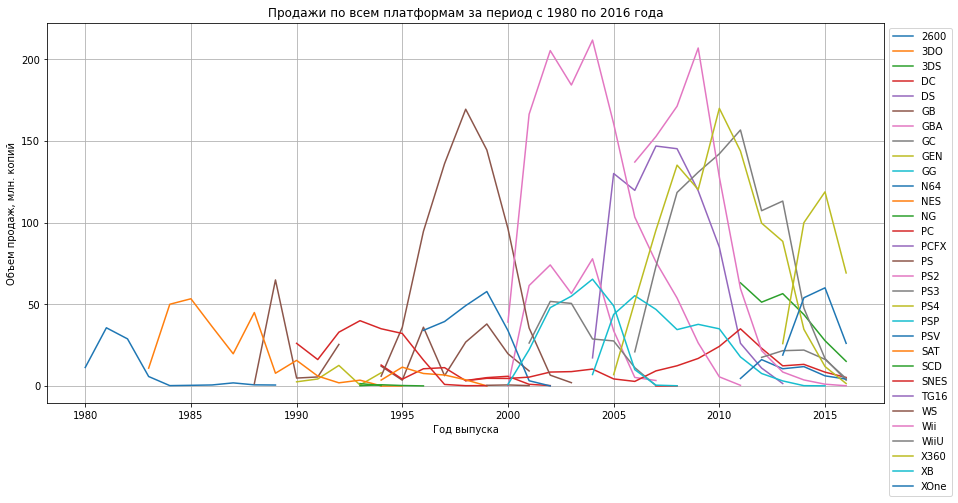

In [22]:
# Чтобы оценить срок появления новых и выхода с рынка старых платформ, построим график распределения 
# продаж по всем платформам по всем годам с использованием переменной data_full:

data_full.pivot_table(index='year_of_release', 
                      columns = 'platform', 
                      values='sum_sales',
                      aggfunc='sum').plot(grid=True, figsize=(15, 7));
plt.title("Продажи по всем платформам за период с 1980 по 2016 года");
plt.legend(bbox_to_anchor=(1, 1));
plt.xlabel("Год выпуска");
plt.ylabel("Объем продаж, млн. копий");

<span style="color:blue">В период с 1988 года по 2006 года новые платформы появлялись практически ежегодно, после 2006 года появились по две платформы в 2011 и 2013 годах. Пик выхода платформ с рынка пришелся на период с 1999 по 2003 года - ушло 6 платформ, до 1999 года ушли 3 платформы, после 2003 года - 4 платформы.</span>

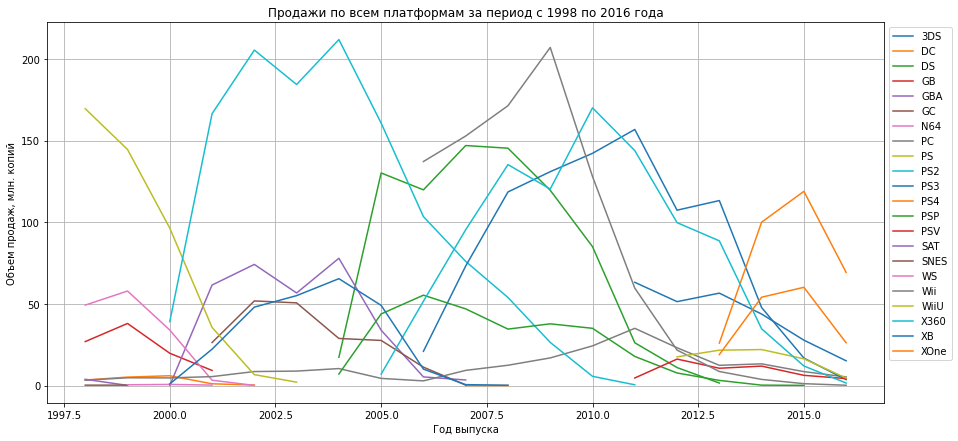

In [23]:
# 3. Определим актуальный период продаж, исходя из которого мы будем делать прогноз,   
# для чего еще раз построим график продаж по всем платформам, но уже за период с 1998 по 2016 года:

data.pivot_table(index='year_of_release', 
                 columns = 'platform', 
                 values='sum_sales', 
                 aggfunc='sum').plot(grid=True, figsize=(15, 7));
plt.title("Продажи по всем платформам за период с 1998 по 2016 года");
plt.legend(bbox_to_anchor=(1, 1));
plt.xlabel("Год выпуска");
plt.ylabel("Объем продаж, млн. копий");
plt.show()

<span style="color:blue">С учетом, что задача работы состоит в планировании продаж на 2017 год (т.е. на будущее время по сравнению со временем составления датафрейма), и с учетом, что до 2014 года продажи по ряду платформ упали до нуля, т.е. ряд платформ вышли из оборота, а также с учетом, что начиная с 2014 четко наметилась общая тенденция к падению продаж компьютерных игр по всем платформам, целесообразнее всего анализировать будущие продажи по данным продаж за период с 2014 по 2016 года.</span>

In [24]:
# 4. Отбросим из датафрейма все данные до 2014 года, в дальнейшем для анализа будет применяться
# период с 2014 по 2016 года:

data = data.loc[data['year_of_release'] >= 2014]
data['year_of_release'].unique()

array([2015, 2014, 2016])

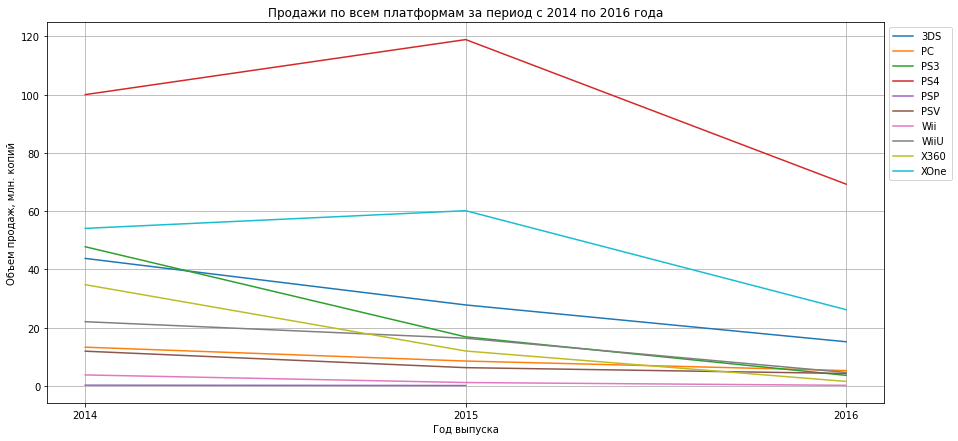

sum_sales
platform year_of_release           
3DS      2014                 43.76
         2015                 27.78
         2016                 15.14
PC       2014                 13.28
         2015                  8.52
         2016                  5.25
PS3      2014                 47.76
         2015                 16.82
         2016                  3.60
PS4      2014                100.00
         2015                118.90
         2016                 69.25
PSP      2014                  0.24
         2015                  0.12
PSV      2014                 11.90
         2015                  6.25
         2016                  4.25
Wii      2014                  3.75
         2015                  1.14
         2016                  0.18
WiiU     2014                 22.03
         2015                 16.35
         2016                  4.60
X360     2014                 34.74
         2015                 11.96
         2016                  1.52
XOne     2014                 54.07
         2015                 60.14
         2016                 26.15

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  sum_sales        1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


In [25]:
# 5. Построим сводную таблицу и график продаж по всем платформам за период с 2014 по 2016 года:

data.pivot_table(index='year_of_release', 
                 columns = 'platform', 
                 values='sum_sales', 
                 aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.title("Продажи по всем платформам за период с 2014 по 2016 года");
plt.legend(bbox_to_anchor=(1, 1));
plt.xlabel("Год выпуска");
plt.ylabel("Объем продаж, млн. копий");
plt.xticks([2014,2015,2016])
plt.show()
display(data.groupby(['platform','year_of_release']).agg({'sum_sales': 'sum'}))
data.info()

<span style="color:blue">За период с 2014 по 2016 года наблюдается общая тенденция по падению объемов продаж на всех платформах. На конец 2016 года по объемам продаж лидируют три платформы: PS4, XOne, 3DS, причем платформа PS4 значительно опережает две другие. Объемы продаж каждой из трех платформ на конец 2016 года превышает 15 млн игр. Данные платформы можно считать потенциально прибыльными.</span>

In [26]:
# Сохраним срез по определенным нами выше потенциально прибыльным платформам в переменную data_top3:

data_top3 = data.query("platform == ['PS4', 'XOne', '3DS']")
data_top3['platform'].unique()

array(['PS4', '3DS', 'XOne'], dtype=object)

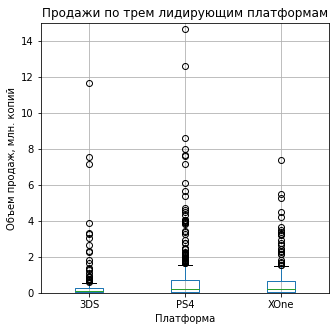

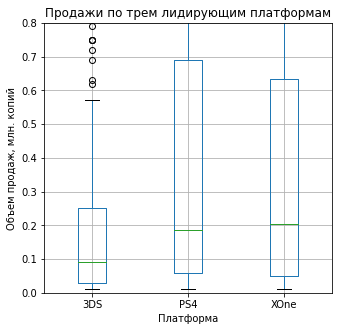

In [27]:
# 6. Построим диаграммы размаха по общему объему продаж по трем лидирующим платформам 
# за период с 2014 по 2016 года с разными значениями по оси Y:

data_top3.boxplot(column='sum_sales', by='platform', figsize=(5, 5)).set_ylim(0, 15);
plt.title("Продажи по трем лидирующим платформам")
plt.suptitle('')
plt.xlabel("Платформа");
plt.ylabel("Объем продаж, млн. копий");
plt.show()
data_top3.boxplot(column='sum_sales', by='platform', figsize=(5, 5)).set_ylim(0, 0.8);
plt.title("Продажи по трем лидирующим платформам");
plt.suptitle('')
plt.xlabel("Платформа");
plt.ylabel("Объем продаж, млн. копий");
plt.show()

<span style="color:blue">По платформам PS4 и XOne медианы, первые и третьи квартили, границы верхних и нижних "усов" расположены примерно на одном и том же значении. По платформе 3DS медиана и первый квартиль чуть ниже, а третий квартиль и верхний "ус" значительно ниже, чем по платформам PS4 и XOne, видимо, ввиду более низких объемов продаж по этой платформе. Однако по всем трем платформам наблюдается большое количество выбросов, при этом на платформе PS4 их значительно больше, чем на остальных платформах. Выбросами видимо являются успешные в плане продаж игры.</span>

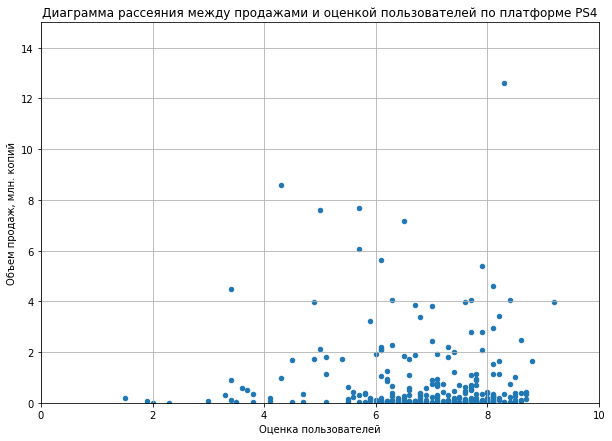

-0.040131589472697356


In [28]:
# 7. Построим диаграмму рассеяния и определим коэффициент корреляции между
# продажами и оценкой пользователей по самой успешной платформе PS4:

data[data['platform'] == 'PS4'].plot(x='user_score', 
                                     y='sum_sales', 
                                     kind='scatter', 
                                     figsize=(10, 7), 
                                     xlim=(0, 10), 
                                     ylim=(0, 15), 
                                     grid = True);
plt.title("Диаграмма рассеяния между продажами и оценкой пользователей по платформе PS4")
plt.xlabel("Оценка пользователей");
plt.ylabel("Объем продаж, млн. копий");
plt.show()
print(data[data['platform'] == 'PS4']['user_score'].corr(data[data['platform'] == 'PS4']['sum_sales']))

<span style="color:blue">Основной разброс значений по продажам сосредоточен между рейтингом 5.5 и 9, при этом коэффициент корреляции мало отличается от нуля, таким образом корреляция между продажами оценкой пользователей слабоотрицательная.</span>

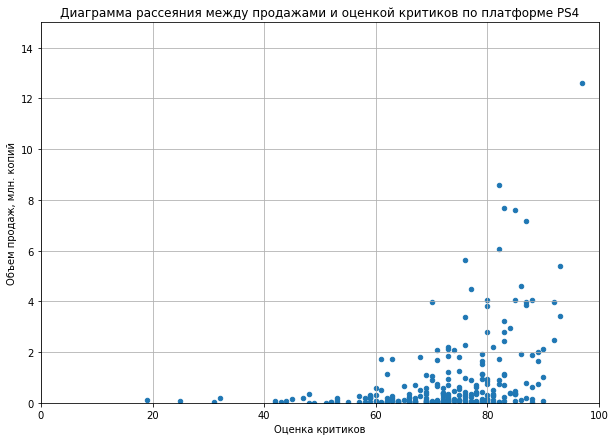

0.40266141068104083


In [29]:
# Построим диаграмму рассеяния и определим коэффициент корреляции между
# продажами и оценкой критиков по самой успешной платформе PS4:

data[data['platform'] == 'PS4'].plot(x='critic_score', 
                                     y='sum_sales', 
                                     kind='scatter', 
                                     figsize=(10, 7), 
                                     xlim=(0, 100), 
                                     ylim=(0, 15), 
                                     grid = True)
plt.title("Диаграмма рассеяния между продажами и оценкой критиков по платформе PS4")
plt.xlabel("Оценка критиков");
plt.ylabel("Объем продаж, млн. копий");
plt.show()
print(data[data['platform'] == 'PS4']['critic_score'].corr(data[data['platform'] == 'PS4']['sum_sales']))

<span style="color:blue">Корреляция между объемом продаж на платформе PS4 и оценкой критиков слабоположительная.</span>

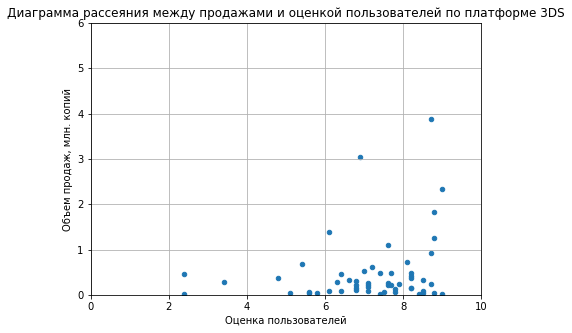

0.2151932718527028



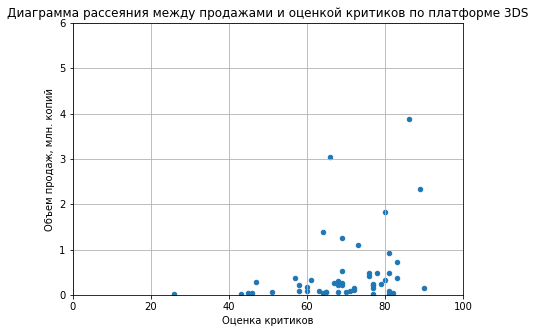

0.314117492869051


In [30]:
# 8. Соотнесем выводы по платформе PS4 с продажами игр на платформах '3DS', 'XOne' из трех прибыльных 
# платформ, для чего построим диаграммы рассеяния и определим коэффициенты корреляции:

data[data['platform'] == '3DS'].plot(x='user_score', 
                                     y='sum_sales', 
                                     kind='scatter', 
                                     figsize=(7, 5), 
                                     xlim=(0, 10), 
                                     ylim=(0, 6), 
                                     grid = True);
plt.title("Диаграмма рассеяния между продажами и оценкой пользователей по платформе 3DS")
plt.xlabel("Оценка пользователей");
plt.ylabel("Объем продаж, млн. копий");
plt.show()
print(data[data['platform'] == '3DS']['user_score'].corr(data[data['platform'] == '3DS']['sum_sales']))
print()
data[data['platform'] == '3DS'].plot(x='critic_score', 
                                     y='sum_sales', 
                                     kind='scatter', 
                                     figsize=(7, 5), 
                                     xlim=(0, 100), 
                                     ylim=(0, 6), 
                                     grid = True);
plt.title("Диаграмма рассеяния между продажами и оценкой критиков по платформе 3DS")
plt.xlabel("Оценка критиков");
plt.ylabel("Объем продаж, млн. копий");
plt.show()
print(data[data['platform'] == '3DS']['critic_score'].corr(data[data['platform'] == '3DS']['sum_sales']))

<span style="color:blue">В отличие от платформы PS4 корреляция между объемом продаж на платформе 3DS и оценкой пользователей слабоположительная, корреляция с оценкой критиков также слабоположительная.</span>

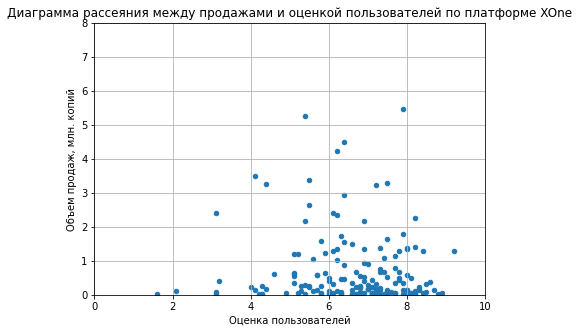

-0.0703839280647581



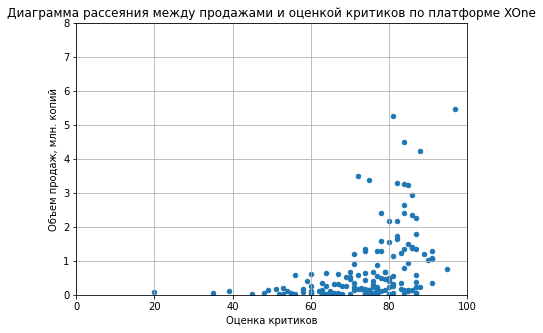

0.42867694370333226


In [31]:
# Построим диаграммы рассеяния и определим коэффициенты корреляции по платформе XOne:

data[data['platform'] == 'XOne'].plot(x='user_score', 
                                      y='sum_sales', 
                                      kind='scatter', 
                                      figsize=(7, 5), 
                                      xlim=(0, 10), 
                                      ylim=(0, 8), 
                                      grid = True);
plt.title("Диаграмма рассеяния между продажами и оценкой пользователей по платформе XOne")
plt.xlabel("Оценка пользователей");
plt.ylabel("Объем продаж, млн. копий");
plt.show()
print(data[data['platform'] == 'XOne']['user_score'].corr(data[data['platform'] == 'XOne']['sum_sales']))
print()
data[data['platform'] == 'XOne'].plot(x='critic_score', 
                                      y='sum_sales', 
                                      kind='scatter', 
                                      figsize=(7, 5), 
                                      xlim=(0, 100), 
                                      ylim=(0, 8), 
                                      grid = True);
plt.title("Диаграмма рассеяния между продажами и оценкой критиков по платформе XOne")
plt.xlabel("Оценка критиков");
plt.ylabel("Объем продаж, млн. копий");
plt.show()
print(data[data['platform'] == 'XOne']['critic_score'].corr(data[data['platform'] == 'XOne']['sum_sales']))

<span style="color:blue">Аналогично с PS4 корреляция между продажами на платформе XOne и отзывами пользователей слабоотрицательная, с оценкой критиков - слабоположительная.</span>

In [32]:
# 9. Посмотрим на общее распределение игр по жанрам в периоде 2014-2016 годов:

display(data.groupby('genre')['genre'].count().sort_values(ascending = False).reset_index(name='count'))
print()
display(data.groupby('genre')['sum_sales'].median().sort_values(ascending = False).reset_index(name='sales_median'))

,genre,count
0,Action,619
1,Role-Playing,221
2,Adventure,185
3,Sports,161
4,Shooter,128
5,Misc,113
6,Racing,69
7,Fighting,60
8,Simulation,44
9,Platform,38


,genre,sales_median
0,Shooter,0.515
1,Sports,0.180
2,Platform,0.140
3,Fighting,0.125
4,Role-Playing,0.110
5,Simulation,0.100
6,Action,0.090
7,Misc,0.090
8,Racing,0.090
9,Strategy,0.060


<span style="color:blue">Больше всего выпускалось игр в жанре Экшн. На втором и третьем месте - РПГ и Приключения. По медианным продажам со значительными отрывом от других лидируют игры с жанром Шутер, за ними идут игры с жанром Спорт и Платформа. Это потенциально прибыльные жанры игр.</span>

### Портрет пользователя каждого региона

In [33]:
# 1. Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5):

display(data.groupby('platform')['na_sales']
      .sum()
      .sort_values(ascending = False)
      .reset_index(name='NA_sales'))
print()
display(data.groupby('platform')['eu_sales']
      .sum()
      .sort_values(ascending = False)
      .reset_index(name='EU_sales'))
print()
display(data.groupby('platform')['jp_sales']
      .sum()
      .sort_values(ascending = False)
      .reset_index(name='JP_sales'))

,platform,NA_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,WiiU,19.36
6,PC,7.23
7,PSV,2.52
8,Wii,2.08
9,PSP,0.00


,platform,EU_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,X360,15.49
6,WiiU,13.15
7,PSV,3.53
8,Wii,2.59
9,PSP,0.00


,platform,JP_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,PSP,0.36
6,XOne,0.32
7,X360,0.08
8,PC,0.00
9,Wii,0.00


<span style="color:blue">В северной Америке топ-5 платформ: PS4, XOne, X360, 3DS, PS3. Первые две платформы лидируют за явным преимуществом. В Европе в топ-5 входят PS4, XOne, PS3, PC, 3DS, у PS4 преимущество еще большее, чем в Северной Америке, объем продаж на занимающей второе место XOne в двое ниже, чем в Северной Америке. В Японии лидер продаж платформа 3DS, за ней следуют PS4, PSV, PS3 и WiiU. Платформа XOne, которая в Северной Америке и Европе занимает второе место по популярности, в Японии совсем не популярна.</span>

In [34]:
# 2. Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5):

display(data.groupby('genre')['na_sales']
        .sum()
        .sort_values(ascending = False)
        .reset_index(name='NA_sales'))
print()
display(data.groupby('genre')['eu_sales']
        .sum()
        .sort_values(ascending = False)
        .reset_index(name='EU_sales'))
print()
display(data.groupby('genre')['jp_sales']
        .sum()
        .sort_values(ascending = False)
        .reset_index(name='JP_sales'))

,genre,NA_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05
5,Fighting,12.43
6,Racing,8.74
7,Platform,6.79
8,Adventure,5.64
9,Simulation,2.63


,genre,EU_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13
5,Misc,12.86
6,Simulation,7.30
7,Platform,6.80
8,Fighting,6.69
9,Adventure,6.49


,genre,JP_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87
5,Adventure,3.60
6,Sports,3.26
7,Platform,2.69
8,Simulation,2.31
9,Racing,1.76


<span style="color:blue">В Северной Америке больше всего продаж пришлось на жанр Шутер, на втором месте Экшн, далее - Спорт, РПГ и игры со смешанным жанром (Misc). В Европе наоборот - наиболее популярен жанр Экшн, а Шутер на втором месте, далее - Спорт, РПГ и Гонки. В Японии два очевидных лидера продаж - это игры РПГ и Экшн, далее со значительными отрывом идут Файтинг, игры со смешанным жанром и Шутеры.</span>

In [35]:
# 3. Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе, для чего сначала обработаем
# пропуски в столбце "рейтинг":

data['rating'].value_counts(dropna=False)
data['rating'] = data['rating'].fillna("Нет рейтинга")
data['rating'].isna().sum()

0

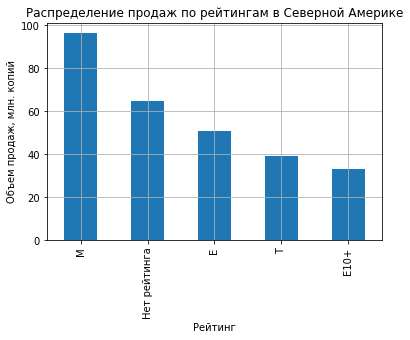

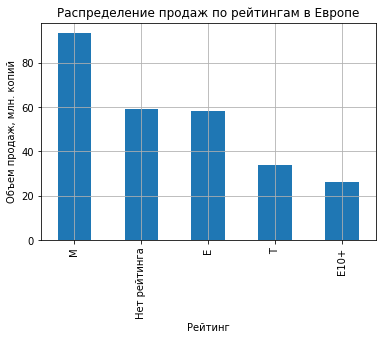

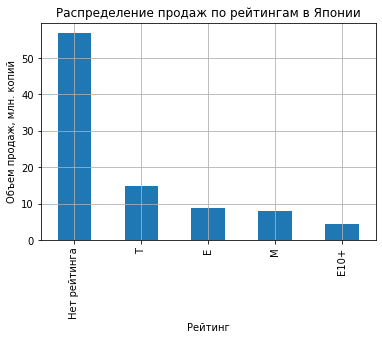

In [36]:
# Построим вертикальные графики:

(
data.groupby('rating')['na_sales']
    .sum().sort_values(ascending=False)
    .plot(x = 'rating', 
          y = 'na_sales', 
          kind = 'bar', 
          figsize=(6,4), 
          grid=True, 
          title = 'Распределение продаж по рейтингам в Северной Америке')
)
plt.xlabel("Рейтинг");
plt.ylabel("Объем продаж, млн. копий");
plt.show()
(
data.groupby('rating')['eu_sales']
    .sum()
    .sort_values(ascending=False)
    .plot(x = 'rating', 
          y = 'eu_sales', 
          kind = 'bar', 
          figsize=(6,4), 
          grid=True, 
          title = 'Распределение продаж по рейтингам в Европе')
)
plt.xlabel("Рейтинг");
plt.ylabel("Объем продаж, млн. копий");
plt.show()
(
data.groupby('rating')['jp_sales']
    .sum().sort_values(ascending=False)
    .plot(x = 'rating', 
          y = 'jp_sales', 
          kind = 'bar', 
          figsize=(6,4), 
          grid=True, 
          title = 'Распределение продаж по рейтингам в Японии')
)
plt.xlabel("Рейтинг");
plt.ylabel("Объем продаж, млн. копий");
plt.show()

<span style="color:blue">Распределение продаж по рейтингам в США и Европе примерно одинаковое: лидируют игры с рейтингом M ("для взрослых"), далее по убывающей игры без рейтинга, потом рейтинги E ("для всех"), T ("подросткам") и E10+ ("Для всех от 10 лет и старше"). В Японии по продажам лидируют игры без рейтинга, далее со значительным отставанием идут игры с рейтингом T ("подросткам"), E ("для всех") и только на четвертом месте игры с рейтингом M ("для взрослых"), который лидирует в США и Европе, на пятом месте игры с рейтингом E10+ ("Для всех от 10 лет и старше"). В Японии популярность игр без рейтинга возможно объясняется жестким контролем за соблюдением играющими рейтинга, поэтому игры без рейтинга являются для японцева наиболее доступными.</span>

### Проверка гипотез

In [37]:
# 1. Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

user_score_XOne = data.loc[(data['platform'] == 'XOne') & (~data['user_score'].isnull())]['user_score']
user_score_PC = data.loc[(data['platform'] == 'PC') & (~data['user_score'].isnull())]['user_score']
alpha = .05
results = st.ttest_ind(user_score_XOne, user_score_PC)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


<span style="color:blue">Нулевая гипотеза H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза H1: средние пользовательские рейтинги платформ Xbox One и PC не равны друг другу. Данные T-теста показали, что нулевую гипотезу отвергнуть не получилось, и средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Для проверки гипотез применен t-тест, т.к. сравниваются достаточно большие и равные по размеру выборки и нет оснований думать, что дисперсии этих совокупностей разные.</span>

In [38]:
# 2. Проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные:

user_score_Action = data.loc[(data['genre'] == 'Action') & (~data['user_score'].isnull())]['user_score']
user_score_Sports = data.loc[(data['genre'] == 'Sports') & (~data['user_score'].isnull())]['user_score']
alpha = .05
results = st.ttest_ind(user_score_Action, user_score_Sports)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


<span style="color:blue">Нулевая гипотеза H0: средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернативная гипотеза H1: средние пользовательские рейтинги жанров Action и Sports разные. Данные T-теста показали, что нулевая гипотеза отвергнута, таким образом средние пользовательские рейтинги жанров Action и Sports действительно разные. Для проверки гипотез применен t-тест, т.к. сравниваются достаточно большие и равные по размеру выборки и нет оснований думать, что дисперсии этих совокупностей разные.</span>

### Общий вывод

<span style="color:blue">

В проекте рассмотрен датафрейм с историческими данными о продажах игр, оценках пользователей и экспертов, жанрах и платформах на территории Северной Америки, Европы и Японии и остальных регионов за период с 1980 по 2016 года. Задача исследования состояла в выявлении закономерностей, определяющих успешность игр. Анализ должен позволить сделать ставку на потенциально популярные продукты и спланировать рекламные кампании. Всего в датафрейме насчитывается 16715 строк и 11 столбцов.
1. На этапе предобработки данных проведена следующая работа:
- названия столбцов приведены к нижнему регистру;
- в столбце "год выпуска" тип данных изменен на int, т.к. года исчисляются в целых числах, а в столбце "оценка пользователя" тип данных изменен на float, чтобы в дальнейшем было возможно строить графики и прослеживать зависимости между оценкой пользователя и другими параметрами;
- в столбце "оценка пользователя" значения "tbd" ("to be determinated") заменены на пропуски, т.к. фактически пропусками и являются;
- в столбце "рейтинг" рейтинг K-A как недействующий заменен на рейтинг E как пришедший ему на замену;
- в части пропусков удалены пропуски в столбцах "год выпуска", "название", "жанр", а в столбцах с рейтингами пропуски не заменялись, т.к. в них содержатся субъективные оценки пользователей и критиков, и их замена приведет к искажению данных, и не удалялись ввиду большого количества таких пропусков;
- удалены три дубликата в наименованиях игр, выпущенных на одной и той же платформе.
2. В рамках исследовательского анализа данных выявлено, что:
- пик выхода новых платформ на рынки приходится на период с 1988 года по 2006 года, когда новые платформы появлялись практически ежегодно, пик выхода платформ с рынка пришелся на период с 1999 по 2003 года, когда ежегодно уходили по несколько платформ. После указанных периодов рынок новых платформ стабилизировался, после 2006 года появилось лишь четыре новые платформы;
- ввиду небольших объемов продаж из датафрейма отсечены продажи за период с 1980 по 1997 года и изучены объемы продаж по всем платформам за период с 1998 года: в топ-5 платформ по продажам вошли PS2, X360, PS3, Wii, DS;
- определен актульный период для исследования с 2014 по 2016 года: к началу этого периода с рынка вышли большое количество платформ, и остались платформы, по которым вплоть до 2016 года сохранялись продажи. Кроме того, наметилась четкая тенденция падения продаж по всем платформам, поэтому использование данного периода целесообразно для прогноза продаж на будущий период;
- анализ продаж по трем лидирующим платформам (PS4, XOne, 3DS) показал более высокую медиану и верхнюю границу распределения по первым двум платформам по сравнению с третьей, и наличие по всем трем платформам большого количества выбросов, которыми являются продажи успешных игр;
- с помощью диаграм рассеяния выявлено, что продажи по самой популярной платформе PS4 практически не зависят от оценки пользователей (корреляция отсутствует) и имеют слабоположительную корреляцию с оценкой критиков. В отличие от платформы PS4 корреляция между объемом продаж на платформе 3DS и оценкой пользователей слабоположительная, корреляция с оценкой критиков также слабоположительная, по платформе XOne корреляция между продажами и отзывами пользователей слабоотрицательная, с оценкой критиков - слабоположительная;
- больше всего выпускалось игр в жанре Экшн, на втором и третьем месте - РПГ и Приключения. По медианным продажам со значительными отрывом от других лидируют игры с жанром Шутер, далее идут игры с жанром Спорт и Платформа. 
3. Составлен портрет пользователя по каждому региону (Северная Америка, Европа, Япония):
- в Северной Америке топ-5 платформ приходится на PS4, XOne, X360, 3DS, PS3, первые две платформы лидируют за явным преимуществом. В Европе в топ-5 входят PS4, XOne, PS3, PC, 3DS. В Японии лидер продаж платформа 3DS, за ней следуют PS4, PSV, PS3 и WiiU;
- в Северной Америке больше всего продаж пришлось на жанр Шутер, на втором месте Экшн, далее - Спорт, РПГ и игры со смешанным жанром. В Европе наоборот - наиболее популярен жанр Экшн, а Шутер на втором месте, далее - Спорт, РПГ и Гонки. В Японии два очевидных лидера продаж - это игры РПГ и Экшн, далее со значительными отрывом идут Файтинг, игры со смешанным жанром и Шутеры;
- распределение продаж по рейтингам в США и Европе примерно одинаковое: лидируют игры с рейтингом M ("для взрослых"), далее по убывающей игры без рейтинга, рейтинги E ("для всех"), T ("подросткам") и E10+ ("для всех от 10 лет и старше"). В Японии по продажам лидируют игры без рейтинга, далее идут игры с рейтингом T ("подросткам"), E ("для всех"), на четвертом и пятом местах игры с рейтингом M ("для взрослых") и E10+ ("для всех от 10 лет и старше").
4. На этапе проверки гипотез:
- с применением t-теста не удалось отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- с применением t-теста подтвердилась гипотеза, что средние пользовательские рейтинги жанров Action и Sports разные.
</span>